# Sign Language Model (Google Kaggle Comp)


Hi, this will officially be my first submission. I hope this notebook helps anyone, and I would love any feedabck; always eager to learn!

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tqdm

# Sample Data Exploration

In [20]:
df_train = pd.read_csv('train.csv')

df_train

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room


In [19]:
df_train['sign'].value_counts()

listen    415
look      414
shhh      411
donkey    410
mouse     408
         ... 
dance     312
person    312
beside    310
vacuum    307
zipper    299
Name: sign, Length: 250, dtype: int64

<AxesSubplot:title={'center':'50/250 Sing Counts'}, ylabel='count'>

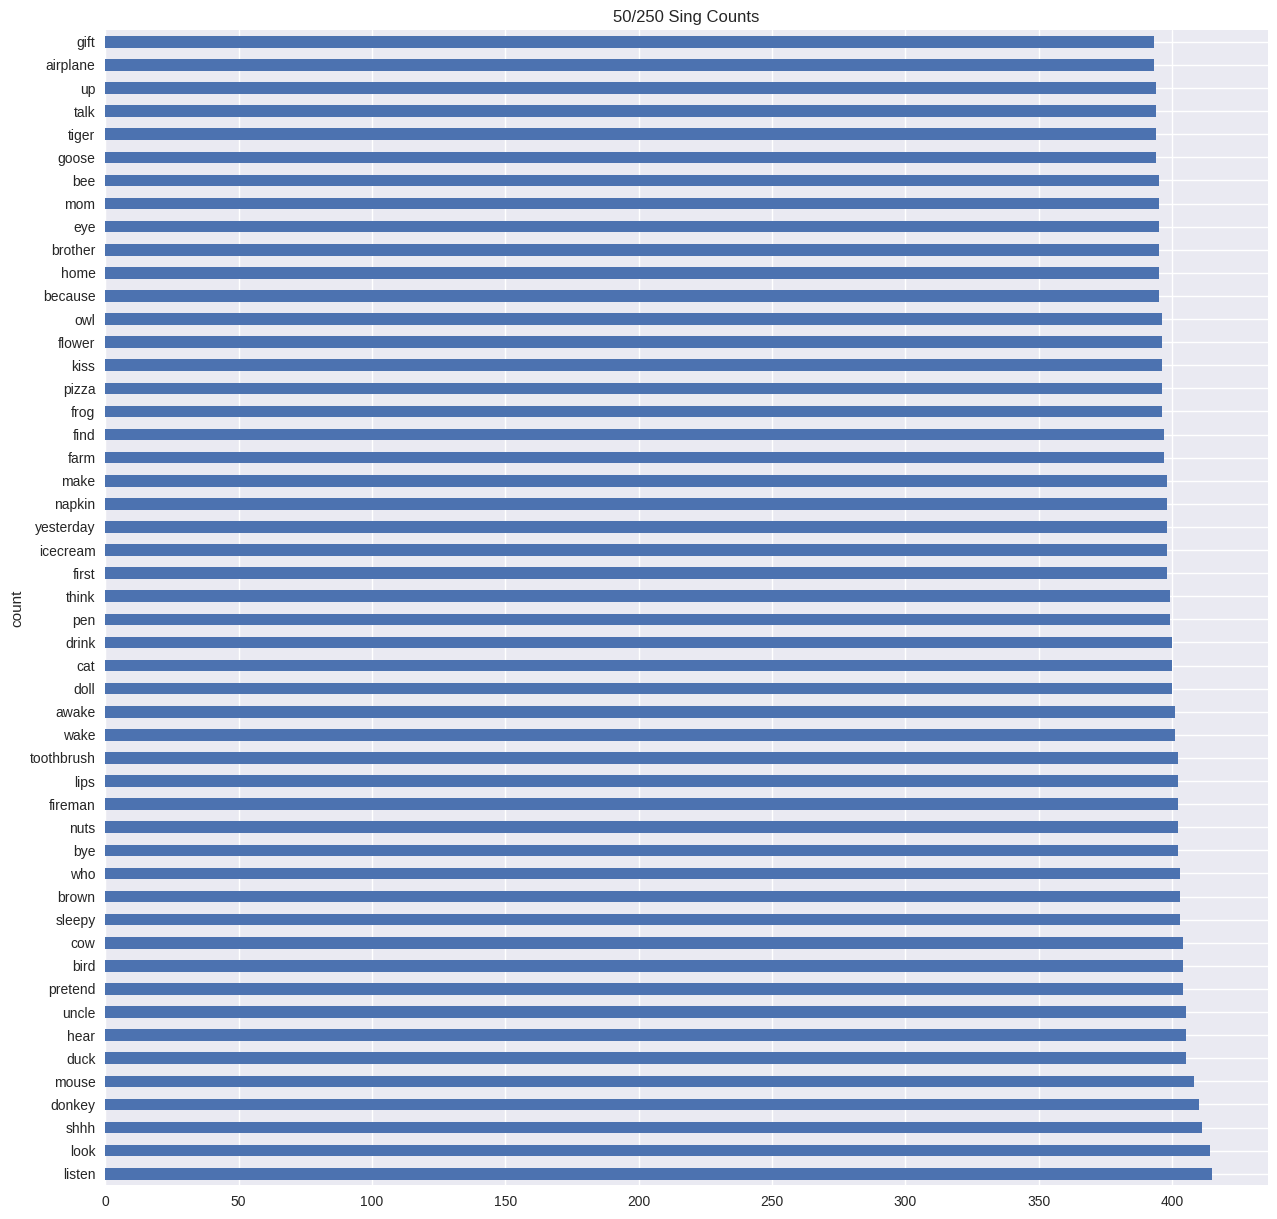

In [4]:
plt.style.use('seaborn')
df_train['sign'].value_counts().head(50).plot(
    kind='barh',figsize=(15,15), title="50/250 Sing Counts", xlabel="count")



In [17]:

example_path = df_train.query('sign == "gift"')["path"].values[0]

example = pd.read_parquet(example_path)

print(example['landmark_index'].nunique())

print(example['type'].unique())

example.head()

468
['face' 'left_hand' 'pose' 'right_hand']


,frame,row_id,type,landmark_index,x,y,z
0,18,18-face-0,face,0,0.481154,0.417818,-0.054069
1,18,18-face-1,face,1,0.484775,0.394146,-0.057618
2,18,18-face-2,face,2,0.483704,0.410014,-0.040766
3,18,18-face-3,face,3,0.476430,0.374310,-0.026645
4,18,18-face-4,face,4,0.485234,0.385773,-0.056272


In [18]:
import os


print(os.getcwd())

/home/ivanbliminse/Documents/Personal_projects/kaggle/Competition/google_sign_language
